In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import us
import numpy as np
import matplotlib.pyplot as plt
from pyseir.models.seir_model import SEIRModel
from pyseir.inference.model_fitter import ModelFitter, run_state
from pyseir.ensembles.ensemble_runner import EnsembleRunner
from pyseir.inference.fit_results import load_inference_result, load_mle_model
from epiweeks import Week, Year
from pyseir.utils import REF_DATE
import scipy
from datetime import datetime, timedelta
import inspect
from pyseir import load_data
from pyseir.cdc.output_mapper import OutputMapper, run_all as run_om
from epiweeks import Week, Year
import pandas as pd
from pyseir.utils import REF_DATE
import matplotlib.backends.backend_pdf

ModuleNotFoundError: No module named 'ujson'

In [78]:
run_om()

Did not match 67 codes to county data.
['00066', '00069', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80013', '80015', '80017', '80026', '80040', '80047', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '90024', '90025', '90026', '90027', '90028', '90029', '90030', '90031', '90032', '90033', '90034', '90035', '90036', '90037', '90038', '90039', '90040', '90041', '90042', '90044', '90045', '90046', '90047', '90048', '90049', '90050', '90051', '90053', '90054', '90055', '90056', '99999']
/anaconda3/envs/pyseir/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Repeated error test failures (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
/Users/xzhang/Documents/covid/covid-data-model/pyseir/models/seir_model.py:16: RuntimeWarning: invalid value e

Did not match 67 codes to county data.
['00066', '00069', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80013', '80015', '80017', '80026', '80040', '80047', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '90024', '90025', '90026', '90027', '90028', '90029', '90030', '90031', '90032', '90033', '90034', '90035', '90036', '90037', '90038', '90039', '90040', '90041', '90042', '90044', '90045', '90046', '90047', '90048', '90049', '90050', '90051', '90053', '90054', '90055', '90056', '99999']
Did not match 67 codes to county data.
['00066', '00069', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80013', '80015', '80017', '80026', '80040', '80047', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '9

Did not match 67 codes to county data.
['00066', '00069', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80013', '80015', '80017', '80026', '80040', '80047', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '90024', '90025', '90026', '90027', '90028', '90029', '90030', '90031', '90032', '90033', '90034', '90035', '90036', '90037', '90038', '90039', '90040', '90041', '90042', '90044', '90045', '90046', '90047', '90048', '90049', '90050', '90051', '90053', '90054', '90055', '90056', '99999']
Did not match 67 codes to county data.
['00066', '00069', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80013', '80015', '80017', '80026', '80040', '80047', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '9

Did not match 67 codes to county data.
['00066', '00069', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80013', '80015', '80017', '80026', '80040', '80047', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '90024', '90025', '90026', '90027', '90028', '90029', '90030', '90031', '90032', '90033', '90034', '90035', '90036', '90037', '90038', '90039', '90040', '90041', '90042', '90044', '90045', '90046', '90047', '90048', '90049', '90050', '90051', '90053', '90054', '90055', '90056', '99999']
/anaconda3/envs/pyseir/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
Did not match 67 codes to county data.
['00066', '00069', '00072', '00078', '60000', '66000', '69000

Did not match 67 codes to county data.
['00066', '00069', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80013', '80015', '80017', '80026', '80040', '80047', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '90024', '90025', '90026', '90027', '90028', '90029', '90030', '90031', '90032', '90033', '90034', '90035', '90036', '90037', '90038', '90039', '90040', '90041', '90042', '90044', '90045', '90046', '90047', '90048', '90049', '90050', '90051', '90053', '90054', '90055', '90056', '99999']
Did not match 67 codes to county data.
['00066', '00069', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80013', '80015', '80017', '80026', '80040', '80047', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '9

In [75]:
df = pd.read_csv('output/pyseir/cdc/2020-05-09-CovidActNow-SEIR_CAN.csv')

In [12]:
om = OutputMapper(fips='06')

[<Target.CUM_DEATH: 'cum death'>, <Target.INC_DEATH: 'inc death'>, <Target.INC_HOSP: 'inc hosp'>]


In [15]:
df

NameError: name 'df' is not defined

In [14]:
om.extrapolated_priors['4 wk ahead inc hosp']

KeyError: '4 wk ahead inc hosp'

In [246]:
priors = om._extrapolated_prior()

<generator object target_column_name at 0x1a1bfc5d68>


In [247]:
priors.keys()

dict_keys(['5 day ahead cum death', '6 day ahead cum death', '7 day ahead cum death', '8 day ahead cum death', '9 day ahead cum death', '10 day ahead cum death', '11 day ahead cum death', '12 day ahead cum death', '13 day ahead cum death', '14 day ahead cum death', '15 day ahead cum death', '16 day ahead cum death', '17 day ahead cum death', '18 day ahead cum death', '19 day ahead cum death', '20 day ahead cum death', '21 day ahead cum death', '22 day ahead cum death', '23 day ahead cum death', '24 day ahead cum death', '25 day ahead cum death', '26 day ahead cum death', '27 day ahead cum death', '28 day ahead cum death', '29 day ahead cum death', '30 day ahead cum death', '31 day ahead cum death', '32 day ahead cum death', '1 wk ahead cum death', '2 wk ahead cum death', '3 wk ahead cum death', '4 wk ahead cum death'])

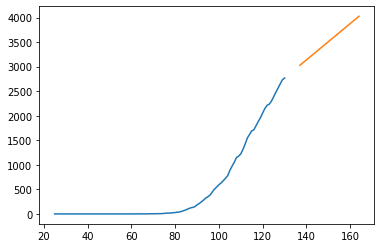

In [215]:
times, _, deaths = load_data.load_new_case_data_by_state(us.states.lookup(om.fips).name, REF_DATE)
plt.plot(times, deaths.cumsum())
plt.plot([(t - REF_DATE).days for t in om.forecast_time_range], priors['cum death']['day'])


In [59]:
om.forecast_time_range

[datetime.datetime(2020, 5, 11, 0, 0),
 datetime.datetime(2020, 5, 12, 0, 0),
 datetime.datetime(2020, 5, 13, 0, 0),
 datetime.datetime(2020, 5, 14, 0, 0),
 datetime.datetime(2020, 5, 15, 0, 0),
 datetime.datetime(2020, 5, 16, 0, 0),
 datetime.datetime(2020, 5, 17, 0, 0),
 datetime.datetime(2020, 5, 18, 0, 0),
 datetime.datetime(2020, 5, 19, 0, 0),
 datetime.datetime(2020, 5, 20, 0, 0),
 datetime.datetime(2020, 5, 21, 0, 0),
 datetime.datetime(2020, 5, 22, 0, 0),
 datetime.datetime(2020, 5, 23, 0, 0),
 datetime.datetime(2020, 5, 24, 0, 0),
 datetime.datetime(2020, 5, 25, 0, 0),
 datetime.datetime(2020, 5, 26, 0, 0),
 datetime.datetime(2020, 5, 27, 0, 0),
 datetime.datetime(2020, 5, 28, 0, 0),
 datetime.datetime(2020, 5, 29, 0, 0),
 datetime.datetime(2020, 5, 30, 0, 0),
 datetime.datetime(2020, 5, 31, 0, 0),
 datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0),
 datetime.datetime(2020, 6, 4, 0, 0),
 datetime.datetime(2020, 6, 5

In [53]:
models, chi_squares = om.run_model_ensemble()

Did not match 67 codes to county data.
['00066', '00069', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80013', '80015', '80017', '80026', '80040', '80047', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '90024', '90025', '90026', '90027', '90028', '90029', '90030', '90031', '90032', '90033', '90034', '90035', '90036', '90037', '90038', '90039', '90040', '90041', '90042', '90044', '90045', '90046', '90047', '90048', '90049', '90050', '90051', '90053', '90054', '90055', '90056', '99999']


In [54]:
forecast_ensemble = om.generate_forecast_ensemble(models)

In [23]:
forecast_ensemble

defaultdict(dict,
            {'cum death': {'day':                                                   0           0            0  \
                                     target_end_date                                         
              -1 day ahead cum death 2020-05-10       3852.707798  212.361198   656.767690   
              0 day ahead cum death  2020-05-11       3976.300343  218.486027   675.808975   
              1 day ahead cum death  2020-05-12       4100.816743  224.653511   694.811665   
              2 day ahead cum death  2020-05-13       4226.295891  230.863361   713.769763   
              3 day ahead cum death  2020-05-14       4352.744701  237.117512   732.674462   
              4 day ahead cum death  2020-05-15       4480.062933  243.415736   751.515222   
              5 day ahead cum death  2020-05-16       4608.167132  249.756870   770.282860   
              6 day ahead cum death  2020-05-17       4737.114809  256.141033   788.972388   
              7 day ah

In [ ]:
quantile_result = om.run()

In [55]:
quantile_result = om.generate_quantile_result(forecast_ensemble, chi_squares)

day
wk
day
wk
day
wk


In [104]:
time = [REF_DATE + timedelta(fit_results['t0'] + t) for t in model.t_list]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     2,     6,    10,    18,    32,    39,
          68,    95,   142,   183,   264,   381,   502,   645,   935,
        1112,  1350,  1661,  2126,  2548,  3716,  4535,  5335,  6877,
        7830,  8858,  9854, 10851, 11808, 12690, 13693, 14629, 15361,
       16165, 16833, 17485, 18104, 18732, 19339, 19904, 20451, 21018,
       21496, 21959, 22469, 22979, 23308, 23533, 23727, 24268, 24480,
       24720, 25886, 25898, 26050, 26276, 26490])

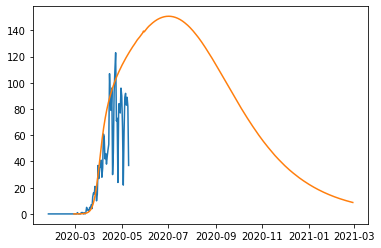

In [106]:
plt.plot([REF_DATE + timedelta(t) for t in times], death)
plt.plot(time, np.append([0], np.diff(model.results['D'])))

/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [120]:
R(t) + R(t) 

In [128]:
results

,target_end_date,expected
0,2020-05-12,3285.149537
0,2020-05-13,3377.273336
0,2020-05-14,3469.389089
0,2020-05-15,3557.086781
0,2020-05-16,3646.075939
0,2020-05-17,3731.387542
0,2020-05-18,3818.948298
0,2020-05-19,3907.018249
0,2020-05-20,3991.259769
0,2020-05-21,4076.861425


In [166]:
def plot_results(fips, pdf):
    model = load_mle_model(fips)
    fit_results = load_inference_result(fips)
    times, _, death = load_data.load_new_case_data_by_state(fips, t0=REF_DATE)
    df = pd.read_csv(f'output/pyseir/cdc/2020-05-11_CovidActNow_SEIR_CAN_{fips}.csv')
    cum_death = df[df.target.str.contains('day ahead cum death')]
    results = list()
    
    for target in cum_death.target.unique():
        
        sub_df = cum_death[cum_death.target == target]
        sub_df['quantile'] = sub_df['quantile'].apply(lambda x: float(x))
        sub_df['pdf'] = np.append(sub_df['quantile'].values[0], np.diff(sub_df['quantile']))
        results.append(pd.DataFrame({
            'target_end_date': [sub_df.iloc[0]['target_end_date']],
            'expected': [(sub_df['pdf'] * sub_df['value']).sum()],
            'ci_025': [float(sub_df[sub_df['quantile'] == 0.025]['value'])],
            'ci_975': [float(sub_df[sub_df['quantile'] == 0.975]['value'])]}))
    
    results = pd.concat(results)   
    results['target_end_date'] = pd.to_datetime(results['target_end_date'])
    
    plt.figure()
    plt.plot([REF_DATE + timedelta(t) for t in times], death.cumsum(), label='observed')
    plt.plot(time, model.results['D'], label='maximum likelihood')
    plt.plot(results['target_end_date'], results['expected'], label='posterior')
    plt.fill_between(x=results['target_end_date'], 
                     y1=results['ci_025'], 
                     y2=results['ci_975'],
                     label='CI_95', alpha=0.3)
    plt.legend()
    
    plt.title('\n'.join([us.states.lookup(fips).name, fips, 'cumulative death']))
    
    plt.tight_layout()
    pdf.savefig()
    
    

In [170]:
from scipy.interpolate import InterpolatedUnivariateSpline
times, _, death = load_data.load_new_case_data_by_state('06', t0=REF_DATE)

TypeError: '>' not supported between instances of 'datetime.timedelta' and 'float'

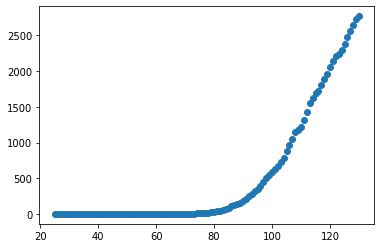

In [186]:
plt.figure()
plt.scatter(times, death.cumsum())
s = InterpolatedUnivariateSpline([REF_DATE + timedelta(t) for t in times], 
                                 death.cumsum(), k=1)
y = s(list(range(150)))
plt.plot(list(range(150)), y, label=order)
plt.legend()
plt.ylim(0, 10000)
plt.show()

/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until exp

/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

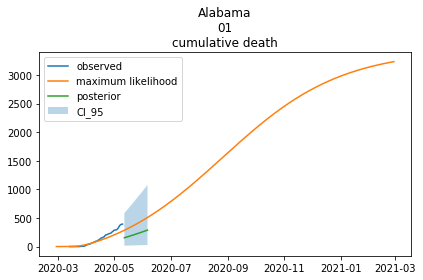

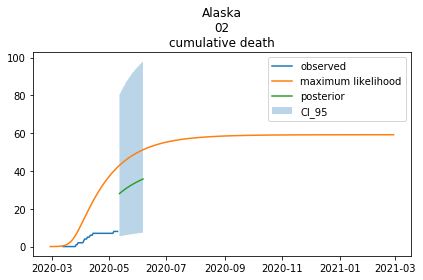

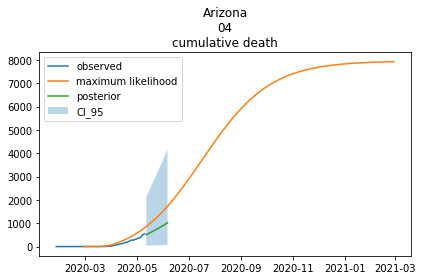

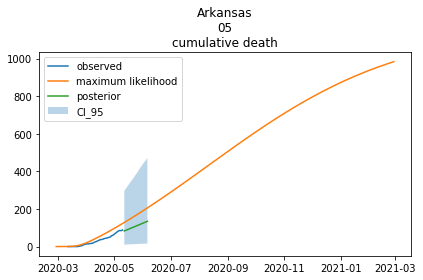

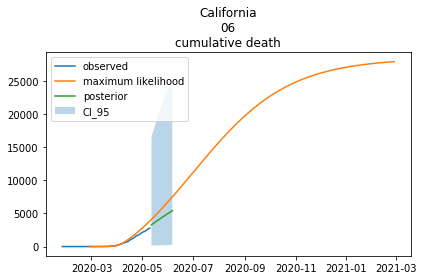

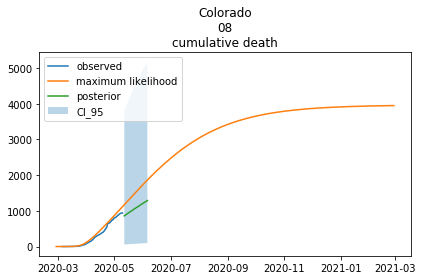

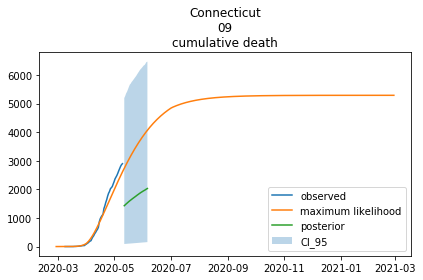

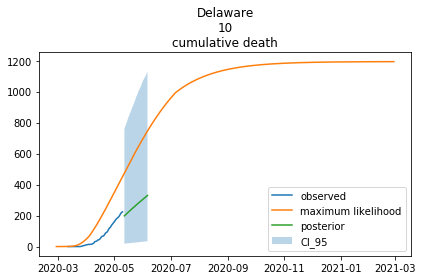

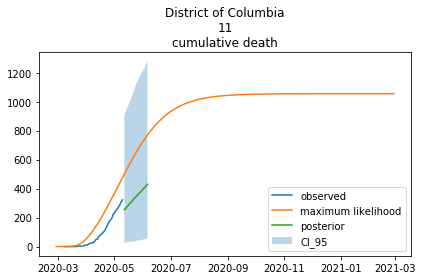

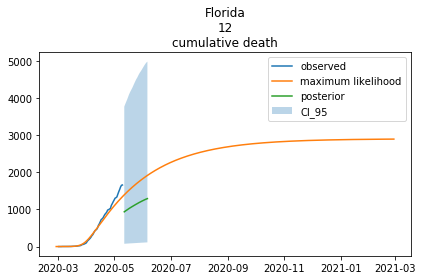

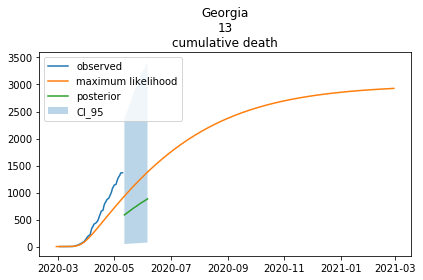

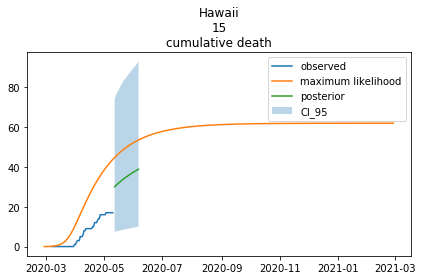

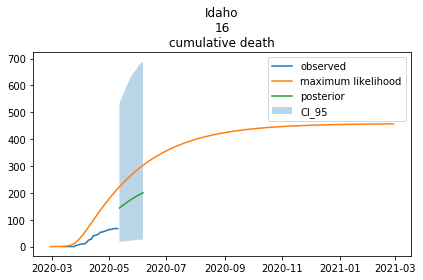

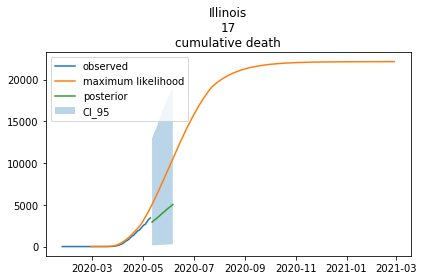

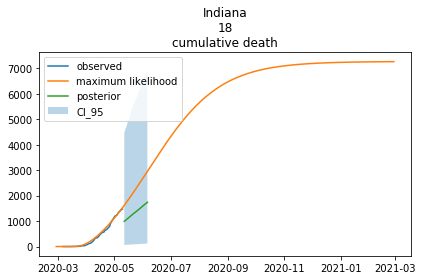

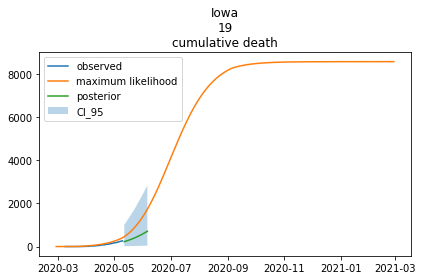

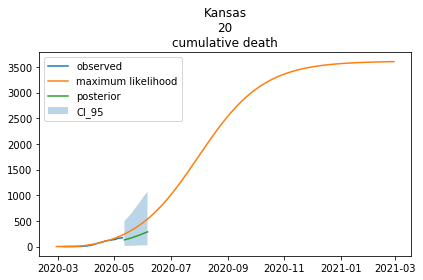

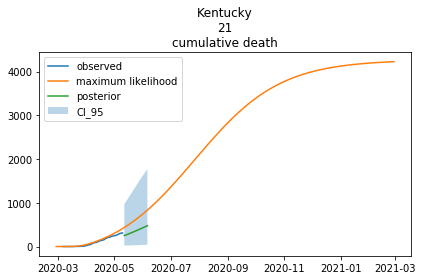

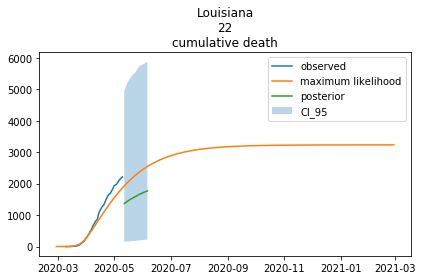

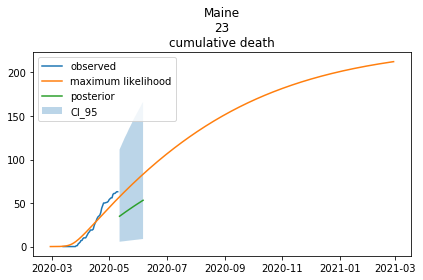

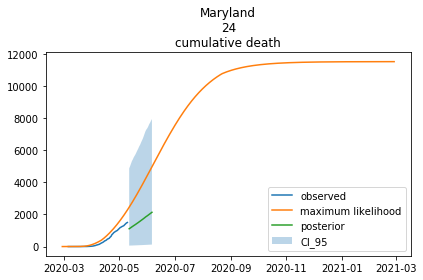

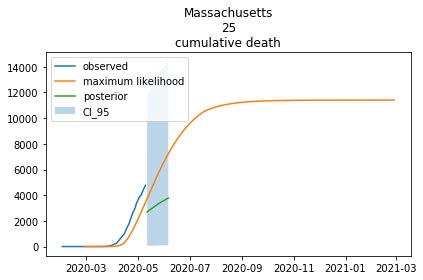

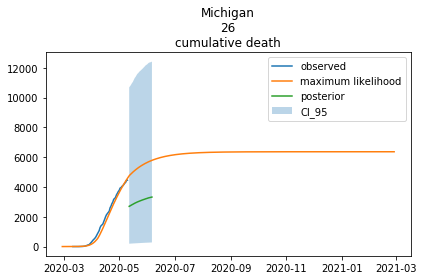

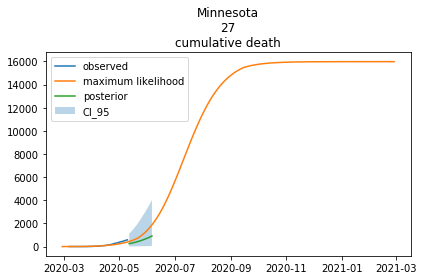

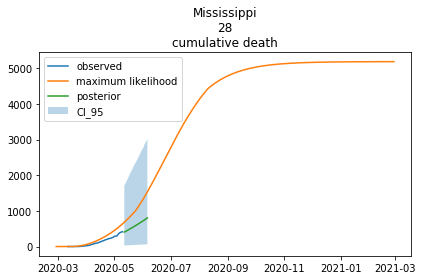

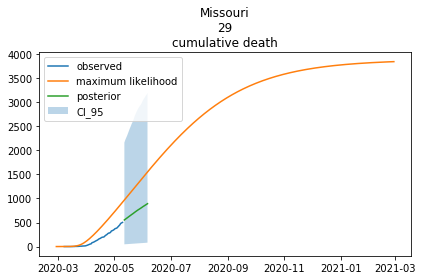

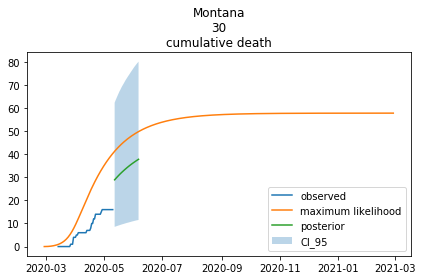

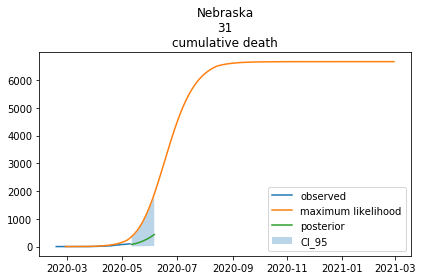

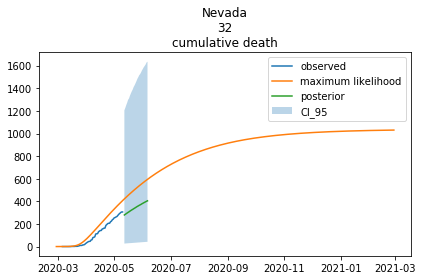

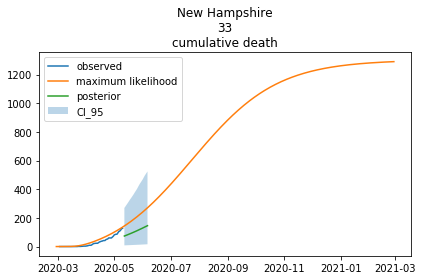

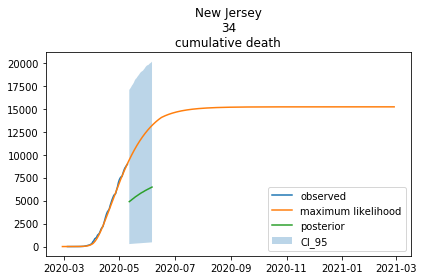

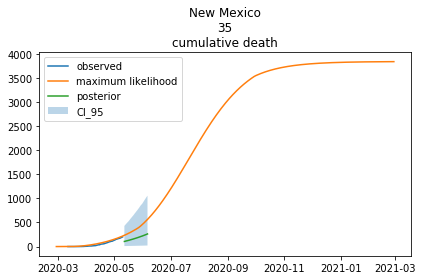

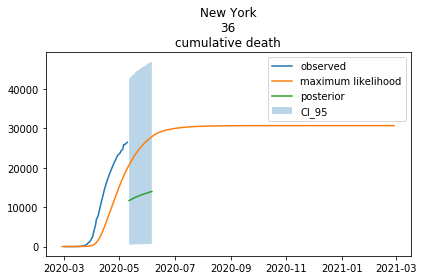

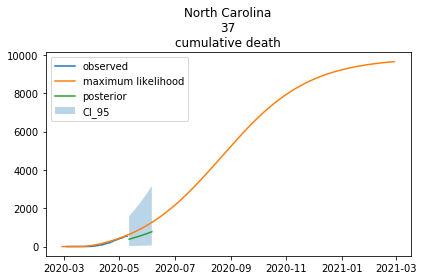

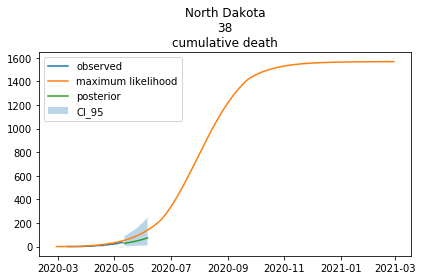

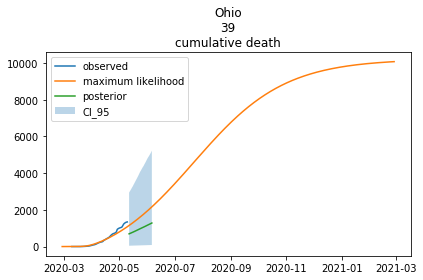

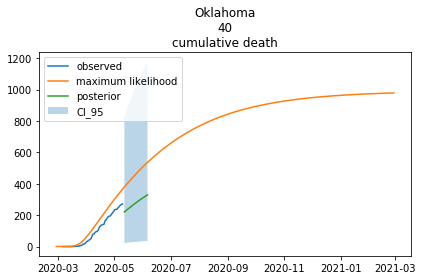

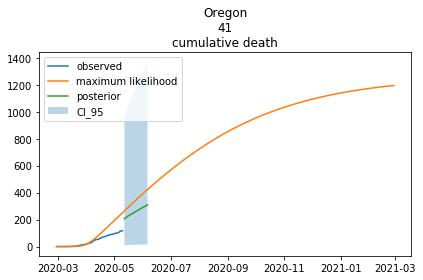

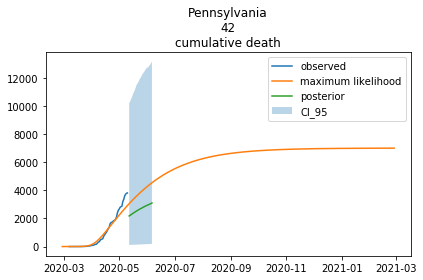

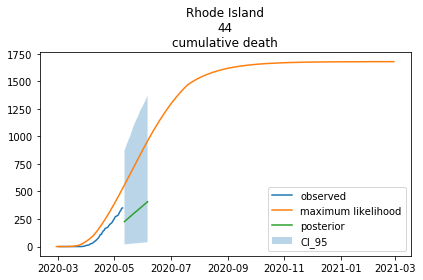

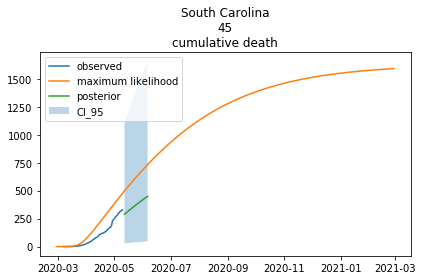

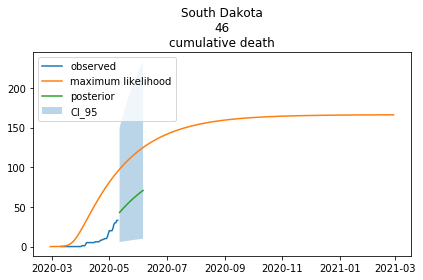

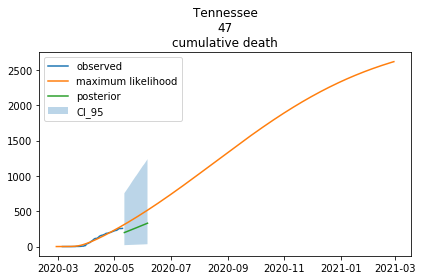

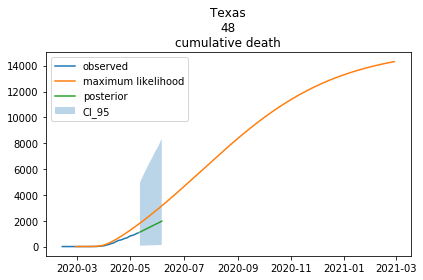

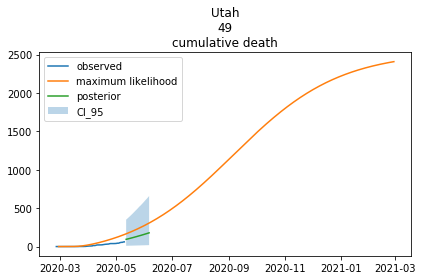

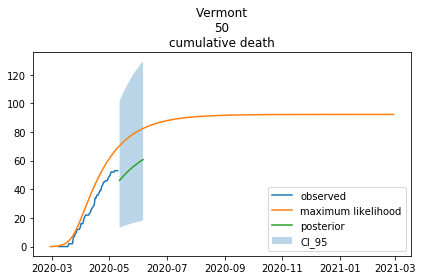

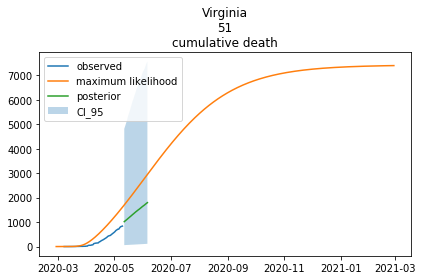

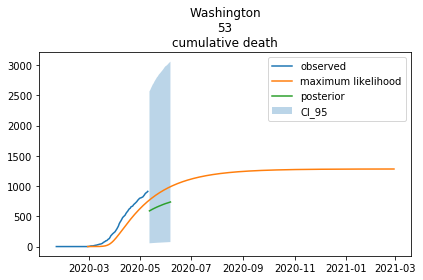

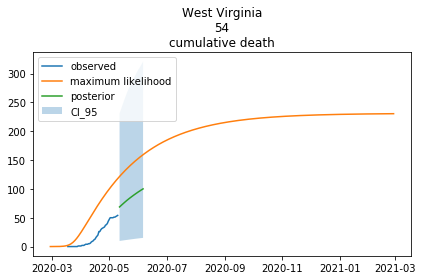

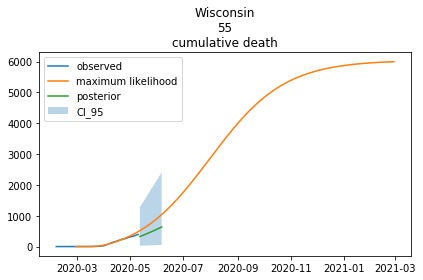

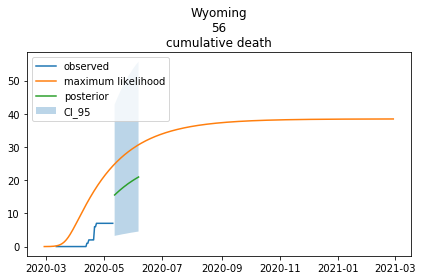

In [168]:
output_path = 'output/pyseir/cdc/report_cum_death.pdf'
pdf = matplotlib.backends.backend_pdf.PdfPages(output_path)
df_whitelist = load_data.load_whitelist()
df_whitelist = df_whitelist[df_whitelist['inference_ok'] == True]
fips_list = list(df_whitelist['fips'].str[:2].unique())
for fips in fips_list:
    try:
        plot_results(fips, pdf)
    except:
        next
pdf.close()

/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda3/envs/pyseir/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


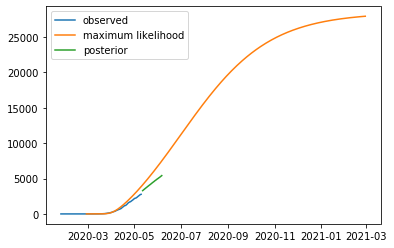

In [137]:
plot_results('06')

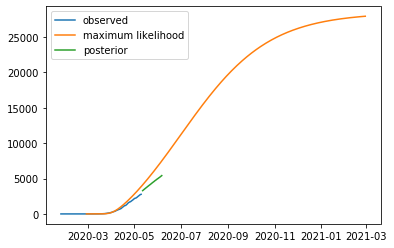

In [56]:
quantile_result

,target,target_end_date,0,quantile,location,location_name,type,forecast_date
0,0 day ahead cum death,2020-05-11,155.847,0.010,06,California,quantile,2020-05-11
1,0 day ahead cum death,2020-05-11,191.958,0.025,06,California,quantile,2020-05-11
2,0 day ahead cum death,2020-05-11,265.69,0.050,06,California,quantile,2020-05-11
3,0 day ahead cum death,2020-05-11,301.536,0.100,06,California,quantile,2020-05-11
4,0 day ahead cum death,2020-05-11,364.967,0.150,06,California,quantile,2020-05-11
...,...,...,...,...,...,...,...,...
83,4 wk ahead inc hosp,2020-06-06,385.857,0.800,06,California,quantile,2020-05-11
84,4 wk ahead inc hosp,2020-06-06,462.495,0.850,06,California,quantile,2020-05-11
85,4 wk ahead inc hosp,2020-06-06,534.43,0.900,06,California,quantile,2020-05-11
86,4 wk ahead inc hosp,2020-06-06,1040.95,0.975,06,California,quantile,2020-05-11


In [93]:
from datetime import date
datetime.strptime(df['forecast_date'][0], '%Y-%m-%d').weekday()

5

In [85]:
df_whitelist = load_data.load_whitelist()
df_whitelist = df_whitelist[df_whitelist['inference_ok'] == True]
fips_list = list(df_whitelist['fips'].str[:2].unique())
states = [us.states.lookup(fips).name for fips in fips_list]
for state in states:
    run_state(state=state, states_only=True)

------------------------------------------------------------------
| FCN = 125.7                   |     Ncalls=281 (285 total)     |
| EDM = 0.0844 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 68.95                   |     Ncalls=429 (434 total)     |
| EDM = 0.047 (Goal: 5E-06)     |            up = 0.5         

------------------------------------------------------------------
| FCN = 54.92                   |     Ncalls=461 (465 total)     |
| EDM = 18.2 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 112.1                   |     Ncalls=984 (990 total)     |
| EDM = 7.53 (Goal: 5E-06)      |            up = 0.5         

------------------------------------------------------------------
| FCN = 63.38                   |     Ncalls=779 (783 total)     |
| EDM = 26.1 (Goal: 5E-06)      |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 53.62                   |     Ncalls=426 (429 total)     |
| EDM = 0.0362 (Goal: 5E-06)    |            up = 0.5         

------------------------------------------------------------------
| FCN = 61.64                   |     Ncalls=366 (372 total)     |
| EDM = 0.895 (Goal: 5E-06)     |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 51.24                   |     Ncalls=384 (392 total)     |
| EDM = 2.76 (Goal: 5E-06)      |            up = 0.5         

------------------------------------------------------------------
| FCN = 36.02                   |     Ncalls=312 (316 total)     |
| EDM = 0.0349 (Goal: 5E-06)    |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------
| FCN = 59.53                   |     Ncalls=508 (508 total)     |
| EDM = 0.096 (Goal: 5E-06)     |            up = 0.5         

In [27]:
OutputMapper.generate_metadata()

In [26]:
run_om()

/Users/xzhang/Documents/covid/covid-data-model/pyseir/models/seir_model.py:263: RuntimeWarning: invalid value encountered in double_scalars
  dEdt = number_exposed - exposed_and_symptomatic - exposed_and_asymptomatic
/Users/xzhang/Documents/covid/covid-data-model/pyseir/models/seir_model.py:276: RuntimeWarning: invalid value encountered in double_scalars
  - infected_and_in_hospital_icu


In [217]:
sub_sample

,target,value,quantile,location,location_name,target_end_date,type,pdf
22,1 day ahead cum death,24.193191,0.010,"=""01""",Alabama,2020-05-23,quantile,0.010
23,1 day ahead cum death,26.800119,0.025,"=""01""",Alabama,2020-05-23,quantile,0.015
24,1 day ahead cum death,30.981713,0.050,"=""01""",Alabama,2020-05-23,quantile,0.025
25,1 day ahead cum death,40.287736,0.100,"=""01""",Alabama,2020-05-23,quantile,0.050
26,1 day ahead cum death,49.334112,0.150,"=""01""",Alabama,2020-05-23,quantile,0.050
27,1 day ahead cum death,60.230091,0.200,"=""01""",Alabama,2020-05-23,quantile,0.050
28,1 day ahead cum death,71.435744,0.250,"=""01""",Alabama,2020-05-23,quantile,0.050
29,1 day ahead cum death,83.942771,0.300,"=""01""",Alabama,2020-05-23,quantile,0.050
30,1 day ahead cum death,98.821411,0.350,"=""01""",Alabama,2020-05-23,quantile,0.050
31,1 day ahead cum death,116.649077,0.400,"=""01""",Alabama,2020-05-23,quantile,0.050


In [218]:
(sub_sample.iloc[2:-1]['value'].values * sub_sample.iloc[2:-1]['pdf'].values).sum()

336.42579366523063

In [29]:
sub_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 924
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   target           23 non-null     object 
 1   value            23 non-null     float64
 2   quantile         22 non-null     float64
 3   location         23 non-null     object 
 4   location_name    23 non-null     object 
 5   target_end_date  23 non-null     object 
 6   type             23 non-null     object 
 7   pdf              22 non-null     float64
dtypes: float64(3), object(5)
memory usage: 1.6+ KB


In [62]:
run_all()

NameError: name 'run_all' is not defined

In [196]:
df = pd.read_csv('~/Documents/covid/covid-data-model/output/pyseir/cdc/2020-05-09_CovidActNow_SEIR_CAN_01.csv',
                 dtype=str)

In [197]:
df[df['target'] == '4 day ahead cum death']

,target,value,quantile,location,location_name,target_end_date,type
88,4 day ahead cum death,26.146521527750387,"=""0.010""","=""01""",Alabama,2020-05-23,quantile
89,4 day ahead cum death,29.025533507510076,"=""0.025""","=""01""",Alabama,2020-05-23,quantile
90,4 day ahead cum death,33.49107450171787,"=""0.050""","=""01""",Alabama,2020-05-23,quantile
91,4 day ahead cum death,43.70500413931352,"=""0.100""","=""01""",Alabama,2020-05-23,quantile
92,4 day ahead cum death,53.725931006444526,"=""0.150""","=""01""",Alabama,2020-05-23,quantile
93,4 day ahead cum death,65.38835040599615,"=""0.200""","=""01""",Alabama,2020-05-23,quantile
94,4 day ahead cum death,77.4239451236478,"=""0.250""","=""01""",Alabama,2020-05-23,quantile
95,4 day ahead cum death,91.15546887078534,"=""0.300""","=""01""",Alabama,2020-05-23,quantile
96,4 day ahead cum death,107.56084757343389,"=""0.350""","=""01""",Alabama,2020-05-23,quantile
97,4 day ahead cum death,126.57882137903947,"=""0.400""","=""01""",Alabama,2020-05-23,quantile


In [198]:
df['location'] = df['location'].apply(lambda s: ('0' + str(s))[-2:])

In [199]:
df['location'] = df['location'].apply(lambda s: s[1:-1])

In [7]:
om = OutputMapper(fips='06075', N_samples=100)
output = om.run()

Did not match 66 codes to county data.
['00066', '00069', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80013', '80015', '80026', '80040', '80047', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '90024', '90025', '90026', '90027', '90028', '90029', '90030', '90031', '90032', '90033', '90034', '90035', '90036', '90037', '90038', '90039', '90040', '90041', '90042', '90044', '90045', '90046', '90047', '90048', '90049', '90050', '90051', '90053', '90054', '90055', '90056', '99999']
/Users/xzhang/Documents/covid/covid-data-model/pyseir/models/seir_model.py:282: RuntimeWarning: overflow encountered in double_scalars
  died_from_icu = HICU * (1 - self.fraction_icu_requiring_ventilator) * mortality_rate_ICU / self.hospitalization_length_of_stay_icu


In [9]:
om.forecast_time_range

[datetime.datetime(2020, 5, 10, 0, 0),
 datetime.datetime(2020, 5, 11, 0, 0),
 datetime.datetime(2020, 5, 12, 0, 0),
 datetime.datetime(2020, 5, 13, 0, 0),
 datetime.datetime(2020, 5, 14, 0, 0),
 datetime.datetime(2020, 5, 15, 0, 0),
 datetime.datetime(2020, 5, 16, 0, 0)]

In [25]:
from string import Template

In [26]:
with open('pyseir/cdc/metadata-CovidActNow_template.txt', 'r') as f:
    metadata = f.read()

In [51]:
import us
us.states.lookup('06').name

'California'

In [ ]:
target_names = []

In [40]:
[t.value for t in om.targets]

['cum death', 'cum hosp', 'inc death', 'inc hosp']

In [34]:
TARGET_NAMES = {'cum death': 'cumulative deaths',
                'inc death': 'incident deaths',
                'cum hosp': 'cumulative hospitalizations',
                'inc hosp': 'incident hospitalizations'}

In [37]:
print(Template(metadata).substitute(dict(Model_targets=', '.join(set(' '.join(t.split(' ')[1:]) for t in output.target.unique())),
                                   forecast_startdate=om.forecast_time_range[0].strftime('%Y-%m-%d'), 
                                   Model_target_names=([TARGET_NAMES[t.value] for t in om.targets]))))

team_name: CovidActNow
team_abbr: CAN
institution_affil:
team_funding: ~
team_experience: Mathematical modeling of covid transmission at state/county level and UI report since Apr. 2020.

model_name: SEIR_CovidActNow
model_abbr: SEIR_CAN
model_output: https://covidactnow.org/
model_repo: https://github.com/covid-projections/covid-data-model

model_contributors: Eric Carlson <eric.carlson@grandrounds.com> Max Henderson <max@maxhenderson.com>
Chris Kelly <ghop02@gmail.com> Igor Kofman <kofman@gmail.com> Xinyu Zhang <xinyu.zhang@grandrounds.com>

Model_targets: day ahead cum hosp, day ahead cum death, day ahead inc hosp, day ahead inc death

Target_loc: some states
time_horizon: ~
Data_format: all requested quantiles
forecast_startdate: 2020-05-10
forecast_frequency: weekly

data_inputs_known: expert elicitation and literature review
data_source_known: JHU

this_model_is_an_ensemble: FALSE
this_model_is_unconditional: TRUE

methods: >-
    Forecast based on experts opinion in public healt

In [12]:
output['target_type'] = output['target'].apply(lambda x: x.split(' ')[-2] + ' ' +x.split(' ')[-1])

In [10]:
output['forecast_date'] = output['target'].apply(lambda x: om.forecast_time_range[int(x.split(' ')[0]) - 2])

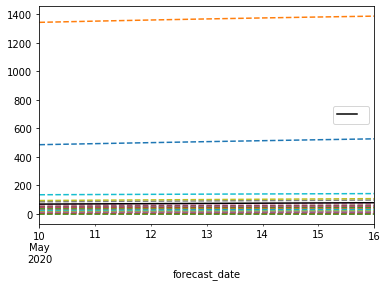

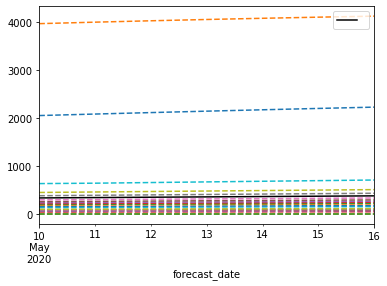

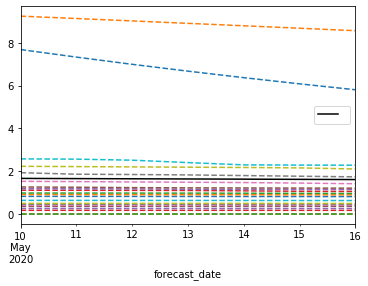

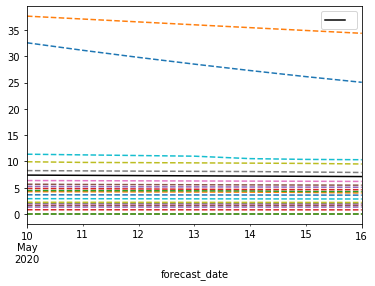

In [22]:

for target_type in output.target_type.unique():
    fig, ax=plt.subplots()
    for quantile in output['quantile'].unique():
        try:
            output[(output.target_type == target_type) 
                 & (output['quantile'] == quantile)
                 & (output['type'] == 'quantile')].plot(x='forecast_date', y='value', 
                                                        label='', 
                                                        ax=ax, linestyle='--')
        except:
            next
            
    output[(output.target_type == target_type) 
         & (output['type'] == 'point')].plot(x='forecast_date', y='value', 
                                             label='', ax=ax, color='k')
            

In [6]:
output.type.unique()

array(['quantile'], dtype=object)

In [43]:
forecast_ensemble = om.generate_forecast_ensemble( model_ensemble)

In [48]:
np.tile([1,2,3], 3)

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [49]:
quantile_output = om.generate_quantile_output(forecast_ensemble)

In [51]:
output.sort_values(['target', 'quantile'])

,target,value,quantile,location,target_end_date,type
0,2 day ahead cum death,0,0.010,06075,2020-05-16,quantile
1,2 day ahead cum death,0,0.025,06075,2020-05-16,quantile
2,2 day ahead cum death,3.93745,0.050,06075,2020-05-16,quantile
3,2 day ahead cum death,8.95873,0.100,06075,2020-05-16,quantile
4,2 day ahead cum death,12.3163,0.150,06075,2020-05-16,quantile
...,...,...,...,...,...,...
149,8 day ahead inc hosp,8.64305,0.800,06075,2020-05-16,quantile
150,8 day ahead inc hosp,10.5081,0.850,06075,2020-05-16,quantile
151,8 day ahead inc hosp,13.1076,0.900,06075,2020-05-16,quantile
152,8 day ahead inc hosp,24.2248,0.975,06075,2020-05-16,quantile


In [32]:
er = EnsembleRunner(fips='06075')

Did not match 66 codes to county data.
['00066', '00069', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80013', '80015', '80026', '80040', '80047', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90018', '90019', '90020', '90021', '90022', '90023', '90024', '90025', '90026', '90027', '90028', '90029', '90030', '90031', '90032', '90033', '90034', '90035', '90036', '90037', '90038', '90039', '90040', '90041', '90042', '90044', '90045', '90046', '90047', '90048', '90049', '90050', '90051', '90053', '90054', '90055', '90056', '99999']
